In [65]:
import pandas as pd

train = pd.read_csv('dm2_dataset_2425_imdb/train70_clf.csv')
test = pd.read_csv('dm2_dataset_2425_imdb/test30_clf.csv')

In [66]:
test

,startYear,runtimeMinutes,canHaveEpisodes,numRegions,ratingCount,companiesNumber,averageRating,totalNominations,totalMedia,totalReviews,...,Europe,North America,South America,Australia,Continent Unknown,genre1,genre2,genre3,deltaCredits,titleType
0,1969,77,1,2,43,1,8.4,0,6,1,...,1,0,1,0,0,51745,16437,5785,5,tvMiniSeries
1,2019,10,0,1,68,8,5.6,0,32,0,...,0,1,0,0,0,18931,17855,17763,20,tvEpisode
2,1928,12,0,1,70,0,4.8,1,4,0,...,0,1,0,0,0,16787,16581,0,0,short
3,1988,43,0,1,18,3,7.7,0,55,0,...,0,1,0,0,0,51745,11665,0,28,tvEpisode
4,1995,23,0,1,53,3,7.2,0,1,0,...,0,1,0,0,0,51745,47408,11665,32,tvEpisode
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44855,1995,106,0,2,23,4,6.4,2,2,0,...,1,0,0,0,1,51745,11665,2063,17,movie
44856,1998,23,0,0,30,5,7.8,0,1,0,...,0,0,0,0,0,47408,0,0,38,tvEpisode
44857,1960,60,0,1,287,4,7.5,0,7,15,...,0,1,0,0,0,51745,16437,5785,15,tvEpisode
44858,1957,93,0,1,13,1,5.4,0,8,0,...,1,0,0,0,0,47408,0,0,11,movie


In [67]:
train.head()

,startYear,runtimeMinutes,canHaveEpisodes,numRegions,ratingCount,companiesNumber,averageRating,totalNominations,totalMedia,totalReviews,...,Europe,North America,South America,Australia,Continent Unknown,genre1,genre2,genre3,deltaCredits,titleType
0,1986,87,0,8,342,8,6.4,1,26,15,...,4,2,0,1,0,51745,0,0,65,movie
1,1921,14,0,9,85,5,6.2,0,8,5,...,5,1,0,0,3,47408,16787,0,2,short
2,1995,45,0,0,38,3,7.7,0,3,0,...,0,0,0,0,0,16437,6144,5785,15,tvEpisode
3,2019,80,0,11,2230,16,6.7,3,52,55,...,5,3,2,1,0,51745,11665,0,63,tvMovie
4,2003,40,0,1,20,1,8.0,0,0,1,...,0,1,0,0,0,47408,16787,0,22,short


In [68]:
# Drop observations where titleType is 'videoGame'
train = train[train['titleType'] != 'videoGame']
test = test[test['titleType'] != 'videoGame']

# Define a mapping dictionary for titleType
titletype_mapping = {
    'movie': 'movie',
    'tvMovie': 'movie',
    'short': 'short',
    'tvShort': 'short',
    'tvSeries': 'tvSeries',
    'tvMiniSeries': 'tvSeries',
    'tvEpisode': 'tvEpisode',
    'tvSpecial': 'tvSpecial',
    'video': 'video'
}

# Apply the mapping to the titleType column
train['titleType'] = train['titleType'].map(titletype_mapping)
test['titleType'] = test['titleType'].map(titletype_mapping)

# Check the new unique values
print("New unique values in titleType:", train['titleType'].unique())

New unique values in titleType: ['movie' 'short' 'tvEpisode' 'tvSeries' 'video' 'tvSpecial']


/var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/ipykernel_36820/1964269640.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['titleType'] = test['titleType'].map(titletype_mapping)


In [69]:
from sklearn.preprocessing import LabelEncoder

X_train = train.drop(columns=['titleType', 'canHaveEpisodes'])
y_train = train['titleType']

X_test = test.drop(columns=['titleType', 'canHaveEpisodes'])
y_test = test['titleType']

In [70]:
# One-hot encode y_train for categorical_crossentropy
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=64, validation_split=0.2
)

Epoch 1/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4273 - loss: 155.3615 - val_accuracy: 0.5385 - val_loss: 15.2586
Epoch 2/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.5216 - loss: 16.1031 - val_accuracy: 0.6662 - val_loss: 7.2176
Epoch 3/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5643 - loss: 8.5281 - val_accuracy: 0.5963 - val_loss: 4.3633
Epoch 4/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.5077 - loss: 3.5656 - val_accuracy: 0.4918 - val_loss: 1.3494
Epoch 5/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.4939 - loss: 1.3120 - val_accuracy: 0.4926 - val_loss: 1.3053
Epoch 6/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.4931 - loss: 1.2940 - val_accuracy: 0.4902 - val_loss: 1.3127
Epoch 7/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.4945 - loss: 1.2917 - val_accuracy: 0.4903 - val_loss: 1.3113
Epoch 8/20
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.4918 -

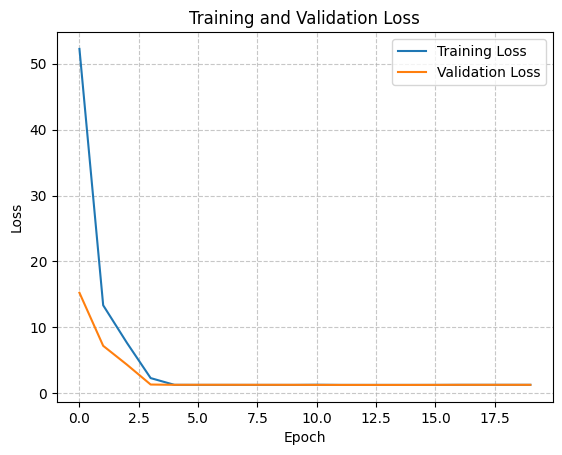

In [73]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

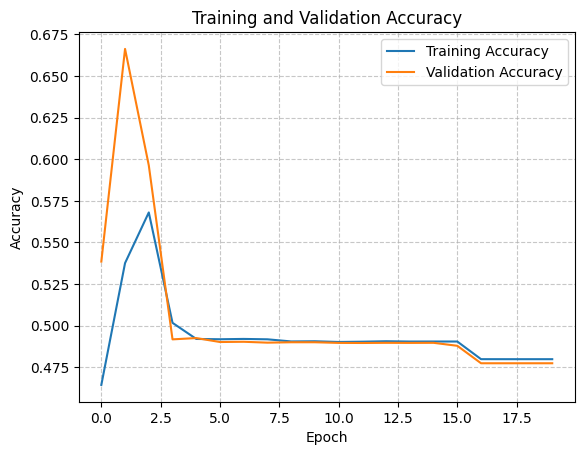

1386/1386 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step


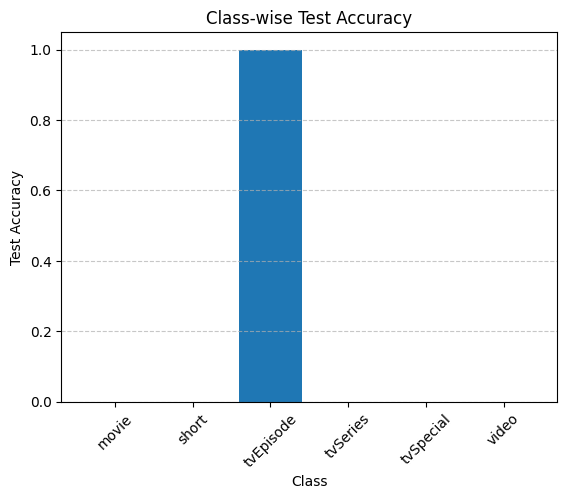

In [74]:
from sklearn.metrics import accuracy_score

# Plot overall accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

# Class-wise accuracy on test set

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Calculate accuracy for each class
class_accuracies = {}
for i, class_name in enumerate(le.classes_):
    idx = (y_test == i)
    class_acc = accuracy_score(y_test[idx], y_pred_classes[idx])
    class_accuracies[class_name] = class_acc

# Plot class-wise accuracy
plt.bar(class_accuracies.keys(), class_accuracies.values())
plt.xlabel('Class')
plt.ylabel('Test Accuracy')
plt.title('Class-wise Test Accuracy')
plt.xticks(rotation=45)
plt.grid(alpha=0.7, linestyle='--', axis='y')
plt.show()

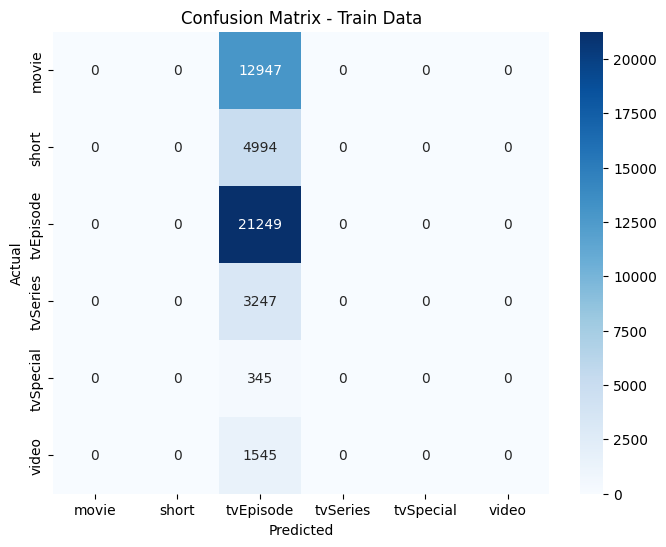

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm_train = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train Data')
plt.show()

In [76]:
from sklearn.metrics import classification_report

# Macro scores
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

              precision    recall  f1-score   support

       movie       0.00      0.00      0.00     12947
       short       0.00      0.00      0.00      4994
   tvEpisode       0.48      1.00      0.65     21249
    tvSeries       0.00      0.00      0.00      3247
   tvSpecial       0.00      0.00      0.00       345
       video       0.00      0.00      0.00      1545

    accuracy                           0.48     44327
   macro avg       0.08      0.17      0.11     44327
weighted avg       0.23      0.48      0.31     44327



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Rating

In [183]:
X_train = train.drop(columns=['averageRating', 'canHaveEpisodes'])
y_train = train['averageRating']

X_test = test.drop(columns=['averageRating', 'canHaveEpisodes'])
y_test = test['averageRating']

# One hot encode the titleType column
X_train = pd.get_dummies(X_train, columns=['titleType'], drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=['titleType'], drop_first=True, dtype=int)

X_train = X_train[[
    'startYear', 'runtimeMinutes', 'numRegions',
    'ratingCount', 'companiesNumber', 'totalNominations',
    'totalMedia', 'totalReviews',
    'South America', 'Australia',
    'genre1', 'genre2', 'genre3',
    'deltaCredits', 'titleType_short', 'titleType_tvEpisode',
    # 'Africa', 'titleType_tvSpecial', 'titleType_video',
    # 'Asia', 'Continent Unknown', 'North America',
    # 'titleType_tvSeries', 'Europe',
]]

X_test = X_test[[
    'startYear', 'runtimeMinutes', 'numRegions',
    'ratingCount', 'companiesNumber', 'totalNominations',
    'totalMedia', 'totalReviews',
    'South America', 'Australia',
    'genre1', 'genre2', 'genre3',
    'deltaCredits', 'titleType_short', 'titleType_tvEpisode',
    # 'Africa', 'titleType_tvSpecial', 'titleType_video',
    # 'Asia', 'Continent Unknown', 'North America',
    # 'titleType_tvSeries', 'Europe',
]]

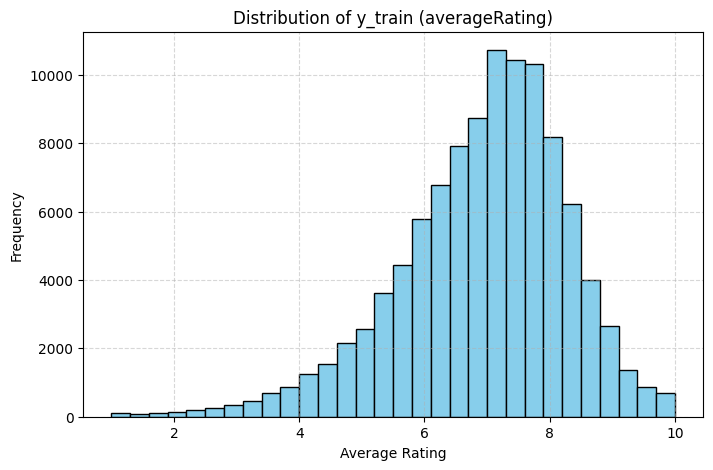

In [184]:
# 0-6
# 6-7
# 7-8
# 8-9
# 9-10

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of y_train (averageRating)')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

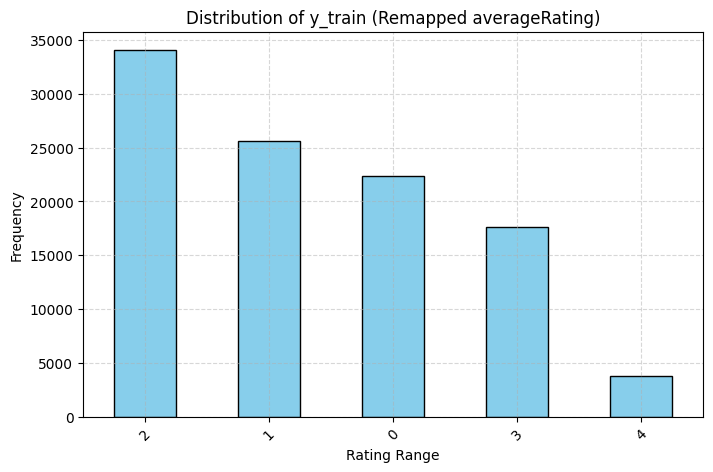

In [185]:
# Map values in intervals to new  bins
def remap_rating(rating):
    if rating < 6:
        return 0
    elif 6 <= rating < 7:
        return 1
    elif 7 <= rating < 8:
        return 2
    elif 8 <= rating < 9:
        return 3
    else:
        return 4

# Remap y_train and y_test
y_train = y_train.map(remap_rating)
y_test = y_test.map(remap_rating)

y_train, y_test

# Barplot the new distribution
plt.figure(figsize=(8, 5))
y_train.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating Range')
plt.ylabel('Frequency')
plt.title('Distribution of y_train (Remapped averageRating)')
plt.xticks(rotation=45)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

In [186]:
# Counts for each class
y_train.value_counts().sort_index()

averageRating
0    22394
1    25582
2    34088
3    17597
4     3766
Name: count, dtype: int64

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural network for remapped y (averageRating bins)
model_rating = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    # Dense(64, activation='relu'),
    # Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model_rating.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.3386 - loss: 1.4589 - val_accuracy: 0.3419 - val_loss: 1.4544
Epoch 2/100
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.3409 - loss: 1.4574 - val_accuracy: 0.3367 - val_loss: 1.4584
Epoch 3/100
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.3447 - loss: 1.4551 - val_accuracy: 0.3373 - val_loss: 1.4573
Epoch 4/100
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.3383 - loss: 1.4611 - val_accuracy: 0.3300 - val_loss: 1.4632
Epoch 5/100
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.3306 - loss: 1.4633 - val_accuracy: 0.3309 - val_loss: 1.4625
Epoch 6/100
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.3349 - loss: 1.4605 - val_accuracy: 0.3412 - val_loss: 1.4546
Epoch 7/100
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.3417 - loss: 1.4556 - val_accuracy: 0.3420 - val_loss: 1.4533
Epoch 8/100
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 

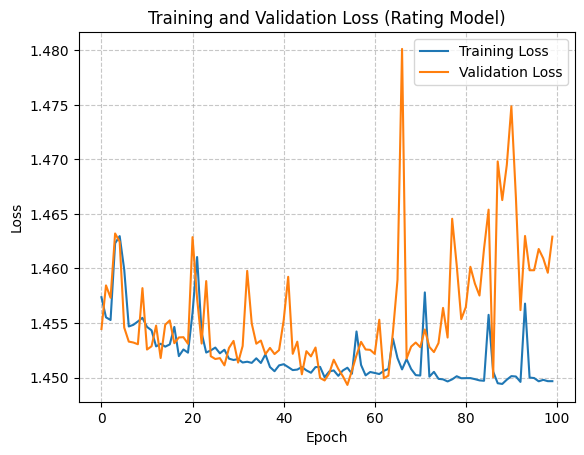

In [203]:
history_rating = model_rating.fit(
    X_train, y_train,
    epochs=100, batch_size=64, validation_split=0.2
)

plt.plot(history_rating.history['loss'], label='Training Loss')
plt.plot(history_rating.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Rating Model)')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

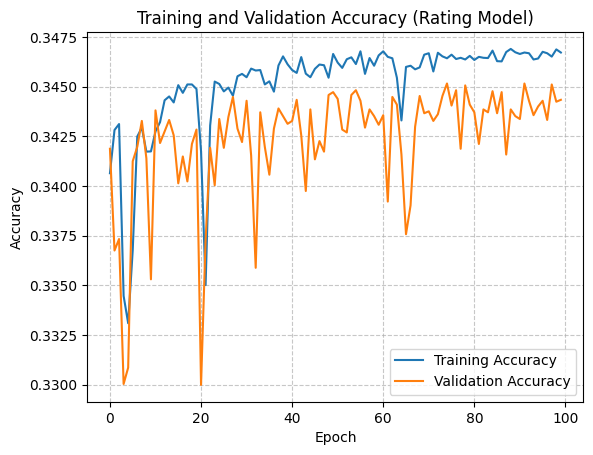

In [204]:
plt.plot(history_rating.history['accuracy'], label='Training Accuracy')
plt.plot(history_rating.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Rating Model)')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

1386/1386 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

              precision    recall  f1-score   support

           0       0.46      0.13      0.20      9588
           1       0.50      0.00      0.00     10967
           2       0.34      0.96      0.50     14494
           3       0.40      0.00      0.00      7566
           4       0.00      0.00      0.00      1712

    accuracy                           0.34     44327
   macro avg       0.34      0.22      0.14     44327
weighted avg       0.40      0.34      0.21     44327



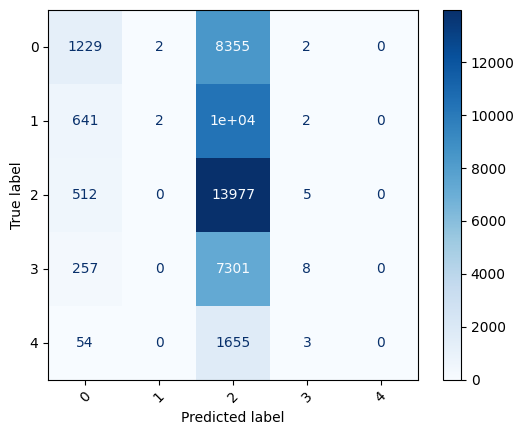

In [205]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model_rating.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes, cmap='Blues', xticks_rotation=45)
plt.show()